In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

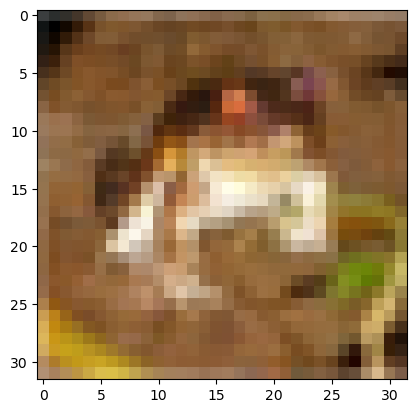

In [48]:
plt.imshow(X_train[0])

In [49]:
y_train.shape

(50000, 1)

In [50]:
X_test.shape

(10000, 32, 32, 3)

In [51]:
y_test.shape

(10000, 1)

In [52]:
y_train[0]

array([6], dtype=uint8)

In [53]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [54]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [55]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [56]:
classes[y_train[0]]

'frog'

In [57]:
X_train[0].shape

(32, 32, 3)

In [58]:
def plot_image(x,y,i):
    plt.figure(figsize = (15,2))
    plt.imshow(x[i])
    plt.title(classes[y[i]])

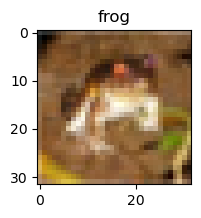

In [59]:
plot_image(X_train,y_train,0)

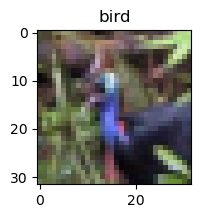

In [60]:
plot_image(X_train,y_train,24)

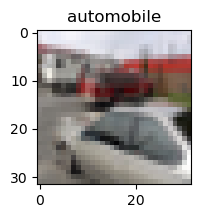

In [61]:
plot_image(X_train,y_train,49999)

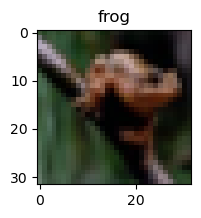

In [62]:
plot_image(X_train,y_train,5000)

In [63]:
X_train=X_train/255.0
X_test=X_test/255.0

In [64]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [65]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [66]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.3753 - loss: 1.7235
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5915 - loss: 1.1648
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6467 - loss: 1.0197
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6832 - loss: 0.9195
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7062 - loss: 0.8520
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7273 - loss: 0.7938
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7441 - loss: 0.7405
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7633 - loss: 0.6908
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7730 - loss: 0.6531
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7915 - loss: 0.6064
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7986 - loss: 0.5793
Epoch 12

In [68]:
X_test_expanded = np.expand_dims(X_test[0], axis=0)
predictions = cnn.predict(X_test_expanded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [69]:
predictions

array([[2.6532999e-04, 1.0117136e-05, 1.1077601e-07, 6.0052174e-01,
        9.0270281e-05, 3.9397144e-01, 1.3737179e-03, 5.5167930e-06,
        3.4160602e-03, 3.4574297e-04]], dtype=float32)

In [74]:
predicted_class = np.argmax(predictions, axis=1)[0]
print(classes[predicted_class])

cat


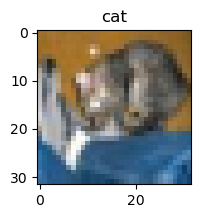

In [75]:
plot_image(X_test,y_test,0)

In [84]:
cnn.save("model_of_image_classification.keras")